In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path 

In [15]:
from sklearn.utils import Bunch  # Array, Target, Target names and so on

In [16]:
from skimage.io import imread # to read my images
from skimage.transform import resize
import skimage as sk

In [48]:
def generate_data(Location , dim =(64,64)):
    """We are Generating the data with different Dimensions of data set and we are bring them into 24*24"""
    
    img_dir = Path(Location)
    print(img_dir)
    folder_dir = [directory for directory in img_dir.iterdir()]
    print(folder_dir)
    Categories =  [fo.name for fo in folder_dir]
    print(Categories)
    
    images = []
    image_data = []
    target = []
    
    desc = "Image Generation"
    
    for i, direc in enumerate(folder_dir):
        #print(i,direc)
        for files in direc.iterdir():
            #print(files)
            img = imread(files)          
            img_resize = resize(img,dim)
            images.append(img_resize)
            image_data.append(img_resize.flatten())
            target.append(i)

    # Coverting list data into array Formate
    flat_data = np.array(image_data)
    target = np.array(target)
    images = np.array(images)
    return Bunch(data = flat_data,
                target= target,
                target_names = Categories,
                images =images,
                desc = desc)
    
    

In [52]:
Dataset = generate_data("Datasets/Fruits")

Datasets\Fruits
[WindowsPath('Datasets/Fruits/Apples'), WindowsPath('Datasets/Fruits/Banana'), WindowsPath('Datasets/Fruits/Guava'), WindowsPath('Datasets/Fruits/Lemons')]
['Apples', 'Banana', 'Guava', 'Lemons']


In [53]:
Dataset.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'desc'])

In [62]:
Dataset.data.shape

(201, 12288)

In [65]:
Dataset.target.shape

(201,)

In [66]:
Dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3])

<AxesSubplot:>

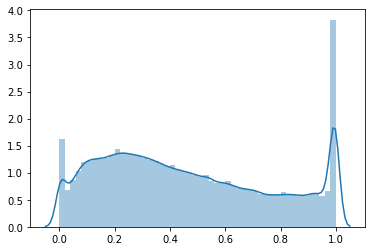

In [67]:
sns.distplot(Dataset.data)

In [56]:
from sklearn.model_selection import train_test_split

In [117]:
x_train,x_test,y_train,y_test= train_test_split(Dataset.data,Dataset.target,test_size=0.20)

In [118]:
from sklearn.linear_model import LogisticRegression

In [129]:
Lr = LogisticRegression(max_iter=4000)

In [130]:
Lr.fit(x_train,y_train)

LogisticRegression(max_iter=4000)

In [131]:
yhat = Lr.predict(x_test)
yhat

array([2, 3, 3, 2, 3, 2, 2, 0, 0, 3, 3, 0, 2, 2, 0, 2, 1, 0, 3, 0, 0, 2,
       3, 3, 3, 3, 1, 3, 2, 2, 0, 1, 1, 3, 3, 3, 0, 1, 0, 0, 1])

In [132]:
pd.DataFrame({"Actual":y_test,
             "Predications":yhat,
             "Same Data":y_test==yhat})

,Actual,Predications,Same Data
0,2,2,True
1,3,3,True
2,3,3,True
3,2,2,True
4,1,3,False
5,2,2,True
6,2,2,True
7,0,0,True
8,0,0,True
9,3,3,True


In [133]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix

In [134]:
accuracy_score(y_test,yhat)

0.8780487804878049

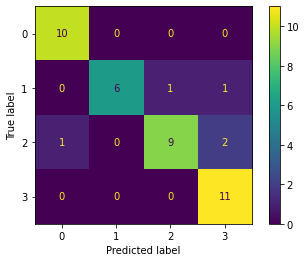

In [135]:
plot_confusion_matrix(Lr,x_test,y_test)

In [136]:
cm = confusion_matrix(y_test,yhat)
cm

array([[10,  0,  0,  0],
       [ 0,  6,  1,  1],
       [ 1,  0,  9,  2],
       [ 0,  0,  0, 11]], dtype=int64)

<AxesSubplot:>

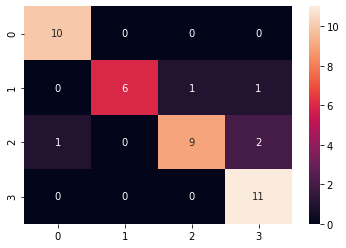

In [137]:
sns.heatmap(cm,annot=True)

In [138]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.75      0.86         8
           2       0.90      0.75      0.82        12
           3       0.79      1.00      0.88        11

    accuracy                           0.88        41
   macro avg       0.90      0.88      0.88        41
weighted avg       0.89      0.88      0.88        41



In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [162]:
knn = KNeighborsClassifier(n_neighbors=2)

In [163]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [164]:
knn_yhat = knn.predict(x_test)

In [165]:
D = pd.DataFrame({"Logistics_New_predication":yhat,
             "Knn_New_predications":knn_yhat,
             "Actual":y_test})

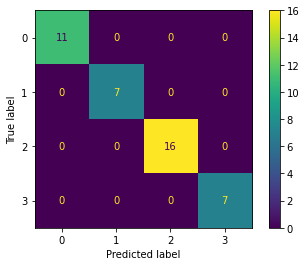

In [166]:
plot_confusion_matrix(knn,x_test,knn_yhat)

In [167]:
cm= confusion_matrix(y_test,knn_yhat)

<AxesSubplot:>

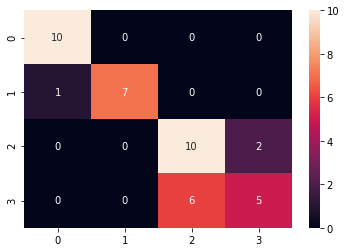

In [168]:
sns.heatmap(cm,annot=True)

In [169]:
print(classification_report(y_test,knn_yhat))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.88      0.93         8
           2       0.62      0.83      0.71        12
           3       0.71      0.45      0.56        11

    accuracy                           0.78        41
   macro avg       0.81      0.79      0.79        41
weighted avg       0.79      0.78      0.77        41



### Task:
1. plot AUC or ROC 